In [25]:
# import dependencies
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from citipy import citipy
import requests
import json
from config import api_key
import time
import openweathermapy.core as owm

In [26]:
# Setting parameters for Api call
settings = {"units": "metric", "appid": api_key}

In [39]:
# Randomly select latitudes and longitudes for city search
np.random.seed(seed=3)
lat = np.random.uniform(-90.0,90.0, size=5000)
lng = np.random.uniform(-180.0,180.0, size=5000)

coord = [(lat[i], lng[i]) for i in range(len(lat))]
len(coord)

5000

In [42]:
# Get nearest cities to latitude and longitude 
cities = [(citipy.nearest_city(lat[i], lng[i]).city_name ,
           citipy.nearest_city(lat[i], lng[i]).country_code) 
           for i in range(len(lat))
         ]
# cut out duplicate cities from list
cities = list(set(cities))
# set up base url for api request
base_url = "http://api.openweathermap.org/data/2.5/weather?appid=" + api_key + '&units=metric'
# initialize empty list for data of interest
latitude = []
longitude = []
max_temp = []
wind_speed = []
humidity = []
cloudiness = []
city_name = []
country_code = []
#Initialize counter
i=1
print(
      'Beginning Data Retrieval',
      '\n-----------------------------------------------------'
     )
# loop throught cities
for city in cities:
    # sleep for on second so the 60 request per minute is held
    time.sleep(1)
    # make a request for each city
    city_and_code = city[0] + ',' + city[1]
    url = base_url + '&q=' + city_and_code
    weather = requests.get(url)
    weather_json = weather.json()
    # if request was successfull store data in each of the appropriate lists
    if '200' in str(weather):
        latitude.append(weather_json['coord']['lat'])
        longitude.append(weather_json['coord']['lon'])
        max_temp.append(weather_json['main']['temp_max'])
        humidity.append(weather_json['main']['humidity'])
        wind_speed.append(weather_json['wind']['speed'])
        cloudiness.append(weather_json['clouds']['all'])
        country_code.append(city[1])
        city_name.append(city[0])
        print('Processing Record ' + str(i) + '|' + city_and_code)
        print(url)
        # increment count if count is greater than 500 break loop
        i += 1
        if i > 500:
            break
        else:
            pass
    else:
        print(weather)
        continue

print(
      '-----------------------------------------------------',
      '\nData Retrieval Complete',
      '\n-----------------------------------------------------'
     )

Beginning Data Retrieval 
-----------------------------------------------------
<Response [404]>
Processing Record 1|bonnyville,ca
http://api.openweathermap.org/data/2.5/weather?appid=365a23001211ffaefa89b28e8fa62797&units=metric&q=bonnyville,ca
Processing Record 2|shingu,jp
http://api.openweathermap.org/data/2.5/weather?appid=365a23001211ffaefa89b28e8fa62797&units=metric&q=shingu,jp
Processing Record 3|bolobo,cd
http://api.openweathermap.org/data/2.5/weather?appid=365a23001211ffaefa89b28e8fa62797&units=metric&q=bolobo,cd
Processing Record 4|okhotsk,ru
http://api.openweathermap.org/data/2.5/weather?appid=365a23001211ffaefa89b28e8fa62797&units=metric&q=okhotsk,ru
Processing Record 5|breves,br
http://api.openweathermap.org/data/2.5/weather?appid=365a23001211ffaefa89b28e8fa62797&units=metric&q=breves,br
<Response [404]>
Processing Record 6|tigzirt,dz
http://api.openweathermap.org/data/2.5/weather?appid=365a23001211ffaefa89b28e8fa62797&units=metric&q=tigzirt,dz
<Response [404]>
Processing 

Processing Record 56|kizukuri,jp
http://api.openweathermap.org/data/2.5/weather?appid=365a23001211ffaefa89b28e8fa62797&units=metric&q=kizukuri,jp
Processing Record 57|panguna,pg
http://api.openweathermap.org/data/2.5/weather?appid=365a23001211ffaefa89b28e8fa62797&units=metric&q=panguna,pg
Processing Record 58|tura,ru
http://api.openweathermap.org/data/2.5/weather?appid=365a23001211ffaefa89b28e8fa62797&units=metric&q=tura,ru
Processing Record 59|vicente guerrero,mx
http://api.openweathermap.org/data/2.5/weather?appid=365a23001211ffaefa89b28e8fa62797&units=metric&q=vicente guerrero,mx
Processing Record 60|inhambane,mz
http://api.openweathermap.org/data/2.5/weather?appid=365a23001211ffaefa89b28e8fa62797&units=metric&q=inhambane,mz
Processing Record 61|marfino,ru
http://api.openweathermap.org/data/2.5/weather?appid=365a23001211ffaefa89b28e8fa62797&units=metric&q=marfino,ru
Processing Record 62|aljezur,pt
http://api.openweathermap.org/data/2.5/weather?appid=365a23001211ffaefa89b28e8fa62797&

Processing Record 112|tiarei,pf
http://api.openweathermap.org/data/2.5/weather?appid=365a23001211ffaefa89b28e8fa62797&units=metric&q=tiarei,pf
<Response [404]>
Processing Record 113|nuuk,gl
http://api.openweathermap.org/data/2.5/weather?appid=365a23001211ffaefa89b28e8fa62797&units=metric&q=nuuk,gl
Processing Record 114|mersing,my
http://api.openweathermap.org/data/2.5/weather?appid=365a23001211ffaefa89b28e8fa62797&units=metric&q=mersing,my
Processing Record 115|novobirilyussy,ru
http://api.openweathermap.org/data/2.5/weather?appid=365a23001211ffaefa89b28e8fa62797&units=metric&q=novobirilyussy,ru
Processing Record 116|ulladulla,au
http://api.openweathermap.org/data/2.5/weather?appid=365a23001211ffaefa89b28e8fa62797&units=metric&q=ulladulla,au
Processing Record 117|palu,id
http://api.openweathermap.org/data/2.5/weather?appid=365a23001211ffaefa89b28e8fa62797&units=metric&q=palu,id
Processing Record 118|formosa,br
http://api.openweathermap.org/data/2.5/weather?appid=365a23001211ffaefa89b28

Processing Record 167|lavumisa,sz
http://api.openweathermap.org/data/2.5/weather?appid=365a23001211ffaefa89b28e8fa62797&units=metric&q=lavumisa,sz
Processing Record 168|olovyannaya,ru
http://api.openweathermap.org/data/2.5/weather?appid=365a23001211ffaefa89b28e8fa62797&units=metric&q=olovyannaya,ru
Processing Record 169|norwalk,us
http://api.openweathermap.org/data/2.5/weather?appid=365a23001211ffaefa89b28e8fa62797&units=metric&q=norwalk,us
Processing Record 170|washington,us
http://api.openweathermap.org/data/2.5/weather?appid=365a23001211ffaefa89b28e8fa62797&units=metric&q=washington,us
<Response [404]>
Processing Record 171|xining,cn
http://api.openweathermap.org/data/2.5/weather?appid=365a23001211ffaefa89b28e8fa62797&units=metric&q=xining,cn
<Response [404]>
Processing Record 172|ranau,my
http://api.openweathermap.org/data/2.5/weather?appid=365a23001211ffaefa89b28e8fa62797&units=metric&q=ranau,my
<Response [404]>
Processing Record 173|kyra,ru
http://api.openweathermap.org/data/2.5/

Processing Record 223|kloulklubed,pw
http://api.openweathermap.org/data/2.5/weather?appid=365a23001211ffaefa89b28e8fa62797&units=metric&q=kloulklubed,pw
Processing Record 224|bandarbeyla,so
http://api.openweathermap.org/data/2.5/weather?appid=365a23001211ffaefa89b28e8fa62797&units=metric&q=bandarbeyla,so
Processing Record 225|jackson,us
http://api.openweathermap.org/data/2.5/weather?appid=365a23001211ffaefa89b28e8fa62797&units=metric&q=jackson,us
Processing Record 226|saint george,us
http://api.openweathermap.org/data/2.5/weather?appid=365a23001211ffaefa89b28e8fa62797&units=metric&q=saint george,us
Processing Record 227|cherskiy,ru
http://api.openweathermap.org/data/2.5/weather?appid=365a23001211ffaefa89b28e8fa62797&units=metric&q=cherskiy,ru
<Response [404]>
<Response [404]>
Processing Record 228|nikolskoye,ru
http://api.openweathermap.org/data/2.5/weather?appid=365a23001211ffaefa89b28e8fa62797&units=metric&q=nikolskoye,ru
Processing Record 229|hofn,is
http://api.openweathermap.org/da

Processing Record 278|marienburg,sr
http://api.openweathermap.org/data/2.5/weather?appid=365a23001211ffaefa89b28e8fa62797&units=metric&q=marienburg,sr
Processing Record 279|kungurtug,ru
http://api.openweathermap.org/data/2.5/weather?appid=365a23001211ffaefa89b28e8fa62797&units=metric&q=kungurtug,ru
Processing Record 280|rimouski,ca
http://api.openweathermap.org/data/2.5/weather?appid=365a23001211ffaefa89b28e8fa62797&units=metric&q=rimouski,ca
Processing Record 281|pierre,us
http://api.openweathermap.org/data/2.5/weather?appid=365a23001211ffaefa89b28e8fa62797&units=metric&q=pierre,us
Processing Record 282|fairbanks,us
http://api.openweathermap.org/data/2.5/weather?appid=365a23001211ffaefa89b28e8fa62797&units=metric&q=fairbanks,us
Processing Record 283|ust-maya,ru
http://api.openweathermap.org/data/2.5/weather?appid=365a23001211ffaefa89b28e8fa62797&units=metric&q=ust-maya,ru
Processing Record 284|keti bandar,pk
http://api.openweathermap.org/data/2.5/weather?appid=365a23001211ffaefa89b28e

<Response [404]>
Processing Record 333|yurga,ru
http://api.openweathermap.org/data/2.5/weather?appid=365a23001211ffaefa89b28e8fa62797&units=metric&q=yurga,ru
Processing Record 334|vallenar,cl
http://api.openweathermap.org/data/2.5/weather?appid=365a23001211ffaefa89b28e8fa62797&units=metric&q=vallenar,cl
Processing Record 335|ugoofaaru,mv
http://api.openweathermap.org/data/2.5/weather?appid=365a23001211ffaefa89b28e8fa62797&units=metric&q=ugoofaaru,mv
Processing Record 336|cockburn town,tc
http://api.openweathermap.org/data/2.5/weather?appid=365a23001211ffaefa89b28e8fa62797&units=metric&q=cockburn town,tc
Processing Record 337|taoudenni,ml
http://api.openweathermap.org/data/2.5/weather?appid=365a23001211ffaefa89b28e8fa62797&units=metric&q=taoudenni,ml
Processing Record 338|siavonga,zm
http://api.openweathermap.org/data/2.5/weather?appid=365a23001211ffaefa89b28e8fa62797&units=metric&q=siavonga,zm
Processing Record 339|jaguaribe,br
http://api.openweathermap.org/data/2.5/weather?appid=365a2

Processing Record 388|leningradskiy,ru
http://api.openweathermap.org/data/2.5/weather?appid=365a23001211ffaefa89b28e8fa62797&units=metric&q=leningradskiy,ru
Processing Record 389|manono,cd
http://api.openweathermap.org/data/2.5/weather?appid=365a23001211ffaefa89b28e8fa62797&units=metric&q=manono,cd
Processing Record 390|shestakovo,ru
http://api.openweathermap.org/data/2.5/weather?appid=365a23001211ffaefa89b28e8fa62797&units=metric&q=shestakovo,ru
Processing Record 391|moyamba,sl
http://api.openweathermap.org/data/2.5/weather?appid=365a23001211ffaefa89b28e8fa62797&units=metric&q=moyamba,sl
Processing Record 392|sao filipe,cv
http://api.openweathermap.org/data/2.5/weather?appid=365a23001211ffaefa89b28e8fa62797&units=metric&q=sao filipe,cv
Processing Record 393|zhanakorgan,kz
http://api.openweathermap.org/data/2.5/weather?appid=365a23001211ffaefa89b28e8fa62797&units=metric&q=zhanakorgan,kz
Processing Record 394|luderitz,na
http://api.openweathermap.org/data/2.5/weather?appid=365a23001211f

Processing Record 443|savannah bight,hn
http://api.openweathermap.org/data/2.5/weather?appid=365a23001211ffaefa89b28e8fa62797&units=metric&q=savannah bight,hn
Processing Record 444|angouleme,fr
http://api.openweathermap.org/data/2.5/weather?appid=365a23001211ffaefa89b28e8fa62797&units=metric&q=angouleme,fr
Processing Record 445|verkh-usugli,ru
http://api.openweathermap.org/data/2.5/weather?appid=365a23001211ffaefa89b28e8fa62797&units=metric&q=verkh-usugli,ru
Processing Record 446|mutis,co
http://api.openweathermap.org/data/2.5/weather?appid=365a23001211ffaefa89b28e8fa62797&units=metric&q=mutis,co
Processing Record 447|qaqortoq,gl
http://api.openweathermap.org/data/2.5/weather?appid=365a23001211ffaefa89b28e8fa62797&units=metric&q=qaqortoq,gl
Processing Record 448|kichera,ru
http://api.openweathermap.org/data/2.5/weather?appid=365a23001211ffaefa89b28e8fa62797&units=metric&q=kichera,ru
Processing Record 449|revda,ru
http://api.openweathermap.org/data/2.5/weather?appid=365a23001211ffaefa89

<Response [404]>
Processing Record 498|conguaco,gt
http://api.openweathermap.org/data/2.5/weather?appid=365a23001211ffaefa89b28e8fa62797&units=metric&q=conguaco,gt
Processing Record 499|rantepao,id
http://api.openweathermap.org/data/2.5/weather?appid=365a23001211ffaefa89b28e8fa62797&units=metric&q=rantepao,id
Processing Record 500|loei,th
http://api.openweathermap.org/data/2.5/weather?appid=365a23001211ffaefa89b28e8fa62797&units=metric&q=loei,th
----------------------------------------------------- 
Data Retrieval Complete 
-----------------------------------------------------


500


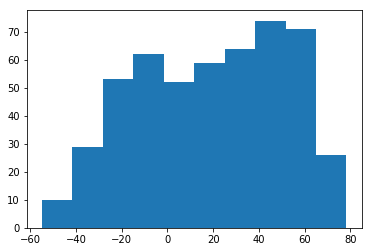

In [43]:
# Determine if latitude of cities found is distributed mostly evenly
print(len(latitude))
plt.hist(latitude)
plt.show()

In [47]:
# create dictionalry of list of data
weather_dict = {'City Name': city_name,
                'Country Code': country_code,
                'Latitude': latitude,
                'Longitude': longitude,
                'Max Temp (C)': max_temp,
                'Wind Speed (m/s)': wind_speed,
                'Humidity': humidity,
                'Cloudiness': cloudiness
               }
# create data frame from dictionary
weather_df = pd.DataFrame(weather_dict)
weather_df.head()

,City Name,Country Code,Latitude,Longitude,Max Temp (C),Wind Speed (m/s),Humidity,Cloudiness
0,bonnyville,ca,54.27,-110.74,28.00,7.70,42,90
1,shingu,jp,33.72,135.99,25.00,3.10,88,75
2,bolobo,cd,-2.17,16.23,21.42,0.65,100,44
3,okhotsk,ru,59.36,143.24,13.87,1.80,82,8
4,breves,br,-1.68,-50.48,27.22,1.80,81,32


In [48]:
# save Data
weather_df.to_csv('500_cities_weather_data.csv')

Text(0.5,1,'Max Temperature vs. Latitude')

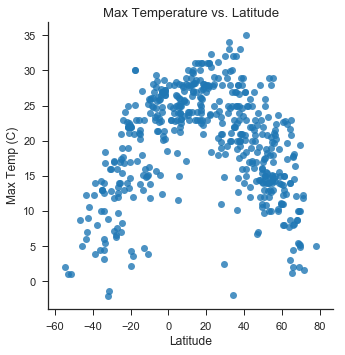

In [62]:
#plot data
sns.set_context("notebook", font_scale=1.1)
sns.set_style("ticks")
sns.lmplot(x='Latitude',
           y='Max Temp (C)',
           data= weather_df,
           fit_reg=False
)
plt.title('Max Temperature vs. Latitude')

Text(0,1,'Kernal Density Estimate \nMax Tempurature vs. Latitude')

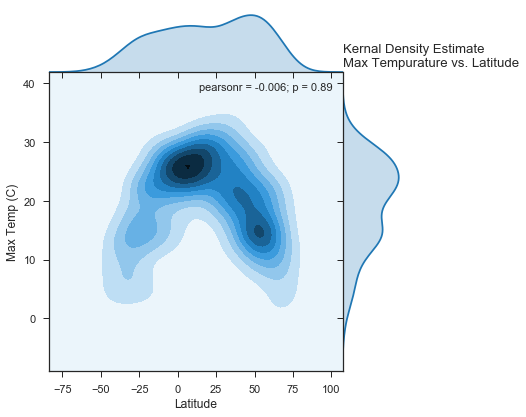

In [74]:
sns.jointplot(x='Latitude',
              y='Max Temp (C)',
              data= weather_df,
              kind='kde',
              space=0
             )
plt.title('Kernal Density Estimate \nMax Tempurature vs. Latitude', loc='left')

Text(0.5,1,'Wind Speed vs. Latitude')

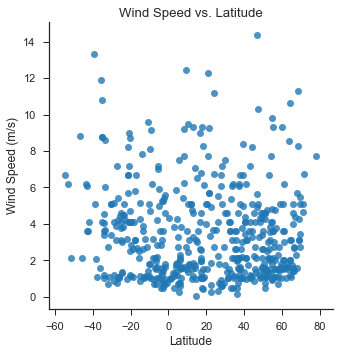

In [57]:
sns.set_context("notebook", font_scale=1.1)
sns.set_style("ticks")
sns.lmplot(x='Latitude',
           y='Wind Speed (m/s)',
           data= weather_df,
           fit_reg=False
          )
plt.title('Wind Speed vs. Latitude')

Text(0,1,'Kernal Density Estimate \nWind Speed vs. Latitude')

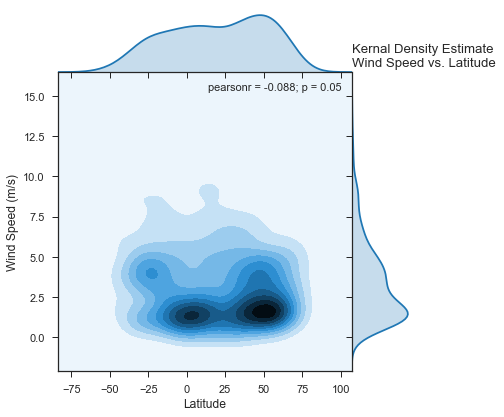

In [75]:
sns.jointplot(x='Latitude',
              y='Wind Speed (m/s)',
              data= weather_df,
              kind='kde',
              space=0
             )
plt.title('Kernal Density Estimate \nWind Speed vs. Latitude', loc='left')

Text(0.5,1,'Humidity vs. Latitude')

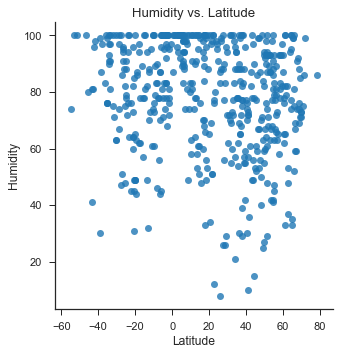

In [63]:
sns.set_context("notebook", font_scale=1.1)
sns.set_style("ticks")
sns.lmplot(x='Latitude',
           y='Humidity',
           data= weather_df,
           fit_reg=False
          )
plt.title('Humidity vs. Latitude')

Text(0,1,'Kernal Density Estimate \nHumidity vs. Latitude')

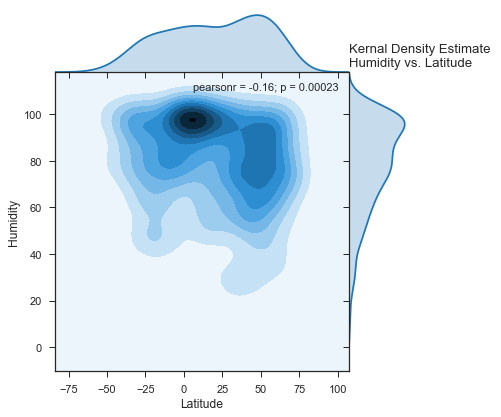

In [76]:
sns.jointplot(x='Latitude',
              y='Humidity',
              data= weather_df,
              kind='kde',
              space=0
             )
plt.title('Kernal Density Estimate \nHumidity vs. Latitude', loc='left')

Text(0.5,1,'Percent Cloudiness vs. Latitude')

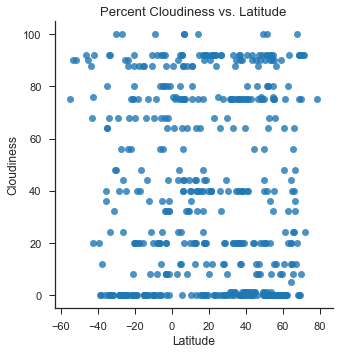

In [64]:
sns.set_context("notebook", font_scale=1.1)
sns.set_style("ticks")
sns.lmplot(x='Latitude',
           y='Cloudiness',
           data= weather_df,
           fit_reg=False
          )
plt.title('Percent Cloudiness vs. Latitude')

Text(0,1,'Kernal Density Estimate \nPercent Coudiness vs. Latitude')

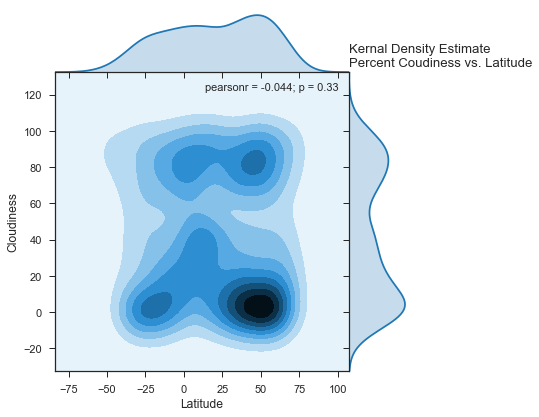

In [78]:
sns.jointplot(x='Latitude',
              y='Cloudiness',
              data= weather_df,
              kind='kde',
              space=0
             )
plt.title('Kernal Density Estimate \nPercent Coudiness vs. Latitude', loc='left')